In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import copy
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
%matplotlib inline

In [2]:
df = pd.read_csv("old_data/survey_without_extreme_values.csv")

In [3]:
wage_data = pd.read_csv("old_data/avg_wage.csv", sep =';')

In [4]:
empty = np.zeros(df.shape[0])

In [5]:
df.insert(5, "adjusted_annual_salary",empty)

In [6]:
def create_wage_dict(wage_data):
    wage_dict = {}
    for i in range(wage_data.shape[0]) :
        wage_dict.update({wage_data['country'].iloc[i]:wage_data['avg_annual_wage'].iloc[i]})
    
    return wage_dict

In [7]:
wage_dict = create_wage_dict(wage_data)

In [8]:
df = df.dropna(axis = 0, subset=['harmonized_salary'])

In [9]:
def adjust_wage (df, wage_dict):
    df['other_monetary_comp'] = df['other_monetary_comp'].fillna(0)
    for i in range (df.shape[0]) :
        if (df['country'].iloc[i] in wage_dict) :
            df['adjusted_annual_salary'].iloc[i] = df['harmonized_salary'].iloc[i] / wage_dict[df['country'].iloc[i]] 
                                                   # df['other_monetary_comp'].iloc[i])/ wage_dict[df['country'].iloc[i]]
    return df

In [10]:
adjust_wage (df, wage_dict)

/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Unnamed: 0,Unnamed: 0.1,timestamp,how_old_are_you,industry,adjusted_annual_salary,job_title,additional_context_on_job_title,annual_salary,other_monetary_comp,...,city,overall_years_of_professional_experience,years_of_experience_in_field,highest_level_of_education_completed,gender,race,industry cluster,industry cluster tf_idf,industry cluster tf_idf_bigrams,harmonized_salary
0,0,0,4/27/2021 11:02:10,25-34,Education (Higher Education),0.885018,Research and Instruction Librarian,NaN,55000,0.0,...,Boston,5-7 years,5-7 years,Master's degree,Woman,White,Education,Education,Education,55000.0
1,1,1,4/27/2021 11:02:22,25-34,Computing or Tech,1.793468,Change & Internal Communications Manager,NaN,54600,4000.0,...,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White,Technology & Science,Technology & Science,Technology & Science,68796.0
2,2,2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",0.547102,Marketing Specialist,NaN,34000,0.0,...,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White,Banking & Insurance,Banking & Insurance,Banking & Insurance,34000.0
3,3,3,4/27/2021 11:02:41,25-34,Nonprofits,0.997657,Program Manager,NaN,62000,3000.0,...,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White,Non Profit Organization,Non profit Organization,Non profit Organization,62000.0
4,4,4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",0.965475,Accounting Manager,NaN,60000,7000.0,...,Greenville,8 - 10 years,5-7 years,College degree,Woman,White,Banking & Insurance,Banking & Insurance,Banking & Insurance,60000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25829,26227,26227,5/17/2021 17:42:33,25-34,Media & Digital,1.367756,Senior Reporter,Trade publication,85000,2000.0,...,New York City,5-7 years,5-7 years,College degree,Woman,White,Unidentified,Unidentified,Unidentified,85000.0
25830,26228,26228,5/17/2021 17:46:38,35-44,Nonprofits,0.643650,Production and Workflow Manager,NaN,40000,0.0,...,Pittsburgh,11 - 20 years,2 - 4 years,College degree,Woman,Asian,Non Profit Organization,Non profit Organization,Non profit Organization,40000.0
25831,26229,26229,5/17/2021 17:47:30,25-34,Computing or Tech,2.381504,Chief of Staff,NaN,148000,29000.0,...,Bay Area,11 - 20 years,11 - 20 years,Master's degree,Woman,White,Technology & Science,Technology & Science,Technology & Science,148000.0
25832,26230,26230,5/17/2021 18:20:07,25-34,"Marketing, Advertising & PR",1.045931,Digital Marketing Manager,"Small agency. I manage a team of ~15 people, b...",65000,5000.0,...,Seattle,2 - 4 years,2 - 4 years,College degree,Woman,White,Advertising,Advertising,Advertising,65000.0


In [11]:
def drop_outliers(df):
    for x in ['annual_salary']:
        q75,q25 = np.percentile(df.loc[:,x],[75,25])
        intr_qr = q75-q25

        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)

        df.loc[df[x] < min,x] = np.nan
        df.loc[df[x] > max,x] = np.nan
    return df

In [12]:
drop_outliers(df)
df = df.dropna(axis = 0, subset=['annual_salary'])

In [13]:
df.drop(columns=['Unnamed: 0', "Unnamed: 0.1", 'timestamp', 'job_title', 'additional_context_on_job_title',
                 'additional_context_on_income', 'other_monetary_comp', 'currency_other',
                 'state', 'city', 'industry', 'industry cluster tf_idf', 'industry cluster', "currency", "country"], inplace = True)

/usr/local/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [14]:
df.drop("race", axis=1, inplace=True)

/usr/local/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [15]:
df.rename(columns={"industry cluster tf_idf_bigrams": "industry"}, inplace= True)

/usr/local/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [16]:
df

,how_old_are_you,adjusted_annual_salary,annual_salary,overall_years_of_professional_experience,years_of_experience_in_field,highest_level_of_education_completed,gender,industry,harmonized_salary
0,25-34,0.885018,55000.0,5-7 years,5-7 years,Master's degree,Woman,Education,55000.0
1,25-34,1.793468,54600.0,8 - 10 years,5-7 years,College degree,Non-binary,Technology & Science,68796.0
2,25-34,0.547102,34000.0,2 - 4 years,2 - 4 years,College degree,Woman,Banking & Insurance,34000.0
3,25-34,0.997657,62000.0,8 - 10 years,5-7 years,College degree,Woman,Non profit Organization,62000.0
4,25-34,0.965475,60000.0,8 - 10 years,5-7 years,College degree,Woman,Banking & Insurance,60000.0
...,...,...,...,...,...,...,...,...,...
25829,25-34,1.367756,85000.0,5-7 years,5-7 years,College degree,Woman,Unidentified,85000.0
25830,35-44,0.643650,40000.0,11 - 20 years,2 - 4 years,College degree,Woman,Non profit Organization,40000.0
25831,25-34,2.381504,148000.0,11 - 20 years,11 - 20 years,Master's degree,Woman,Technology & Science,148000.0
25832,25-34,1.045931,65000.0,2 - 4 years,2 - 4 years,College degree,Woman,Advertising,65000.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24820 entries, 0 to 25833
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   how_old_are_you                           24820 non-null  object 
 1   adjusted_annual_salary                    24820 non-null  float64
 2   annual_salary                             24820 non-null  float64
 3   overall_years_of_professional_experience  24820 non-null  object 
 4   years_of_experience_in_field              24820 non-null  object 
 5   highest_level_of_education_completed      24644 non-null  object 
 6   gender                                    24820 non-null  object 
 7   industry                                  24820 non-null  object 
 8   harmonized_salary                         24820 non-null  float64
dtypes: float64(3), object(6)
memory usage: 1.9+ MB


In [18]:
df['how_old_are_you'] = pd.Categorical(
    df['how_old_are_you'],
    ordered=True,
    categories=[
        "under 18",
        "18-24",
        "25-34",
        "35-44",
        "45-54",
        "55-64",
        "65 or over"
    ]
)

/var/folders/13/2bs52tzx5vb8jg2f094msm5h0000gn/T/ipykernel_4437/652388023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['how_old_are_you'] = pd.Categorical(


In [19]:
df['gender'] = pd.Categorical(df['gender'], ordered=False)

/var/folders/13/2bs52tzx5vb8jg2f094msm5h0000gn/T/ipykernel_4437/4115056020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = pd.Categorical(df['gender'], ordered=False)


In [20]:
df['industry'] = pd.Categorical(df['industry'], ordered=False)

/var/folders/13/2bs52tzx5vb8jg2f094msm5h0000gn/T/ipykernel_4437/1355963409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['industry'] = pd.Categorical(df['industry'], ordered=False)


In [21]:
df['overall_years_of_professional_experience'] = pd.Categorical(
    df['overall_years_of_professional_experience'],
    ordered=True,
    categories=[
        "1 year or less",
        "2 - 4 years",
        "5-7 years",
        "8 - 10 years",
        "11 - 20 years",
        "21 - 30 years",
        "31 - 40 years",
        "41 years or more"
    ]
)

/var/folders/13/2bs52tzx5vb8jg2f094msm5h0000gn/T/ipykernel_4437/2871961291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['overall_years_of_professional_experience'] = pd.Categorical(


In [22]:
df['years_of_experience_in_field'] = pd.Categorical(
    df['years_of_experience_in_field'],
    ordered=True,
    categories=[
        "1 year or less",
        "2 - 4 years",
        "5-7 years",
        "8 - 10 years",
        "11 - 20 years",
        "21 - 30 years",
        "31 - 40 years",
        "41 years or more"
    ]
)

/var/folders/13/2bs52tzx5vb8jg2f094msm5h0000gn/T/ipykernel_4437/1248987801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['years_of_experience_in_field'] = pd.Categorical(


In [23]:
df['highest_level_of_education_completed'] = pd.Categorical(
    df['highest_level_of_education_completed'],
    ordered=True,
    categories=[
        #"Unknown",
        "High School",
        "Some college",
        "College degree",
        "Professional degree (MD, JD, etc.)",
        "Master's degree",
        "PhD"
    ]
)
#df['highest_level_of_education_completed'] = df['highest_level_of_education_completed'].fillna('Unknown')

/var/folders/13/2bs52tzx5vb8jg2f094msm5h0000gn/T/ipykernel_4437/3256007866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['highest_level_of_education_completed'] = pd.Categorical(


In [24]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24644 entries, 0 to 25833
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype   
---  ------                                    --------------  -----   
 0   how_old_are_you                           24644 non-null  category
 1   adjusted_annual_salary                    24644 non-null  float64 
 2   annual_salary                             24644 non-null  float64 
 3   overall_years_of_professional_experience  24644 non-null  category
 4   years_of_experience_in_field              24644 non-null  category
 5   highest_level_of_education_completed      24644 non-null  category
 6   gender                                    24644 non-null  category
 7   industry                                  24644 non-null  category
 8   harmonized_salary                         24644 non-null  float64 
dtypes: category(6), float64(3)
memory usage: 916.7 KB


/usr/local/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [25]:
df

,how_old_are_you,adjusted_annual_salary,annual_salary,overall_years_of_professional_experience,years_of_experience_in_field,highest_level_of_education_completed,gender,industry,harmonized_salary
0,25-34,0.885018,55000.0,5-7 years,5-7 years,Master's degree,Woman,Education,55000.0
1,25-34,1.793468,54600.0,8 - 10 years,5-7 years,College degree,Non-binary,Technology & Science,68796.0
2,25-34,0.547102,34000.0,2 - 4 years,2 - 4 years,College degree,Woman,Banking & Insurance,34000.0
3,25-34,0.997657,62000.0,8 - 10 years,5-7 years,College degree,Woman,Non profit Organization,62000.0
4,25-34,0.965475,60000.0,8 - 10 years,5-7 years,College degree,Woman,Banking & Insurance,60000.0
...,...,...,...,...,...,...,...,...,...
25829,25-34,1.367756,85000.0,5-7 years,5-7 years,College degree,Woman,Unidentified,85000.0
25830,35-44,0.643650,40000.0,11 - 20 years,2 - 4 years,College degree,Woman,Non profit Organization,40000.0
25831,25-34,2.381504,148000.0,11 - 20 years,11 - 20 years,Master's degree,Woman,Technology & Science,148000.0
25832,25-34,1.045931,65000.0,2 - 4 years,2 - 4 years,College degree,Woman,Advertising,65000.0


In [26]:
counts = df['industry'].value_counts()
counts

Technology & Science       4396
Education                  3076
Non profit Organization    2282
Banking & Insurance        2081
Health                     1974
Public & Government        1792
Industry                   1775
Other                      1082
Advertising                1021
Unidentified                936
Culture                     877
Law                         866
Consulting                  730
Retail                      444
Human Ressources            416
Construction                383
Social                      255
Agriculture & Food          123
Energy                       54
Ecology & Environment        41
Security & Defense           40
Name: industry, dtype: int64

In [27]:
new_df = df.loc[df['industry'].isin(counts.index[counts > 500])]
new_df

,how_old_are_you,adjusted_annual_salary,annual_salary,overall_years_of_professional_experience,years_of_experience_in_field,highest_level_of_education_completed,gender,industry,harmonized_salary
0,25-34,0.885018,55000.0,5-7 years,5-7 years,Master's degree,Woman,Education,55000.0
1,25-34,1.793468,54600.0,8 - 10 years,5-7 years,College degree,Non-binary,Technology & Science,68796.0
2,25-34,0.547102,34000.0,2 - 4 years,2 - 4 years,College degree,Woman,Banking & Insurance,34000.0
3,25-34,0.997657,62000.0,8 - 10 years,5-7 years,College degree,Woman,Non profit Organization,62000.0
4,25-34,0.965475,60000.0,8 - 10 years,5-7 years,College degree,Woman,Banking & Insurance,60000.0
...,...,...,...,...,...,...,...,...,...
25829,25-34,1.367756,85000.0,5-7 years,5-7 years,College degree,Woman,Unidentified,85000.0
25830,35-44,0.643650,40000.0,11 - 20 years,2 - 4 years,College degree,Woman,Non profit Organization,40000.0
25831,25-34,2.381504,148000.0,11 - 20 years,11 - 20 years,Master's degree,Woman,Technology & Science,148000.0
25832,25-34,1.045931,65000.0,2 - 4 years,2 - 4 years,College degree,Woman,Advertising,65000.0


In [28]:
new_df

,how_old_are_you,adjusted_annual_salary,annual_salary,overall_years_of_professional_experience,years_of_experience_in_field,highest_level_of_education_completed,gender,industry,harmonized_salary
0,25-34,0.885018,55000.0,5-7 years,5-7 years,Master's degree,Woman,Education,55000.0
1,25-34,1.793468,54600.0,8 - 10 years,5-7 years,College degree,Non-binary,Technology & Science,68796.0
2,25-34,0.547102,34000.0,2 - 4 years,2 - 4 years,College degree,Woman,Banking & Insurance,34000.0
3,25-34,0.997657,62000.0,8 - 10 years,5-7 years,College degree,Woman,Non profit Organization,62000.0
4,25-34,0.965475,60000.0,8 - 10 years,5-7 years,College degree,Woman,Banking & Insurance,60000.0
...,...,...,...,...,...,...,...,...,...
25829,25-34,1.367756,85000.0,5-7 years,5-7 years,College degree,Woman,Unidentified,85000.0
25830,35-44,0.643650,40000.0,11 - 20 years,2 - 4 years,College degree,Woman,Non profit Organization,40000.0
25831,25-34,2.381504,148000.0,11 - 20 years,11 - 20 years,Master's degree,Woman,Technology & Science,148000.0
25832,25-34,1.045931,65000.0,2 - 4 years,2 - 4 years,College degree,Woman,Advertising,65000.0


# Learning K-modes

In [29]:
df_kmodes = new_df.copy(deep=True)

In [30]:
df_kmodes = new_df.copy(deep=True)

In [31]:
df_kmodes = df_kmodes.drop(["annual_salary"], axis=1)

In [32]:
df_kmodes

,how_old_are_you,adjusted_annual_salary,overall_years_of_professional_experience,years_of_experience_in_field,highest_level_of_education_completed,gender,industry,harmonized_salary
0,25-34,0.885018,5-7 years,5-7 years,Master's degree,Woman,Education,55000.0
1,25-34,1.793468,8 - 10 years,5-7 years,College degree,Non-binary,Technology & Science,68796.0
2,25-34,0.547102,2 - 4 years,2 - 4 years,College degree,Woman,Banking & Insurance,34000.0
3,25-34,0.997657,8 - 10 years,5-7 years,College degree,Woman,Non profit Organization,62000.0
4,25-34,0.965475,8 - 10 years,5-7 years,College degree,Woman,Banking & Insurance,60000.0
...,...,...,...,...,...,...,...,...
25829,25-34,1.367756,5-7 years,5-7 years,College degree,Woman,Unidentified,85000.0
25830,35-44,0.643650,11 - 20 years,2 - 4 years,College degree,Woman,Non profit Organization,40000.0
25831,25-34,2.381504,11 - 20 years,11 - 20 years,Master's degree,Woman,Technology & Science,148000.0
25832,25-34,1.045931,2 - 4 years,2 - 4 years,College degree,Woman,Advertising,65000.0


In [33]:
df_kmodes_bis = df_kmodes.copy(deep=True)

def get_category(x):
    if x>=1:
        return "well payed"
    else:
        return "bad payed"

df_kmodes_bis["adjusted_annual_salary"] = df_kmodes_bis["harmonized_salary"] / 69392
df_kmodes_bis["payed"] = df_kmodes["adjusted_annual_salary"].apply(get_category)
df_kmodes_bis.drop(["adjusted_annual_salary", "harmonized_salary"], axis=1, inplace=True)
df_kmodes_bis

,how_old_are_you,overall_years_of_professional_experience,years_of_experience_in_field,highest_level_of_education_completed,gender,industry,payed
0,25-34,5-7 years,5-7 years,Master's degree,Woman,Education,bad payed
1,25-34,8 - 10 years,5-7 years,College degree,Non-binary,Technology & Science,well payed
2,25-34,2 - 4 years,2 - 4 years,College degree,Woman,Banking & Insurance,bad payed
3,25-34,8 - 10 years,5-7 years,College degree,Woman,Non profit Organization,bad payed
4,25-34,8 - 10 years,5-7 years,College degree,Woman,Banking & Insurance,bad payed
...,...,...,...,...,...,...,...
25829,25-34,5-7 years,5-7 years,College degree,Woman,Unidentified,well payed
25830,35-44,11 - 20 years,2 - 4 years,College degree,Woman,Non profit Organization,bad payed
25831,25-34,11 - 20 years,11 - 20 years,Master's degree,Woman,Technology & Science,well payed
25832,25-34,2 - 4 years,2 - 4 years,College degree,Woman,Advertising,well payed


In [84]:
# Elbow curve to find optimal K
cost = []
K = range(2,10)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 10, verbose=0)
    kmode.fit_predict(df_kmodes_bis[
        [
            "gender",
            "industry",
            "highest_level_of_education_completed",
            "how_old_are_you",
            "years_of_experience_in_field"
        ]
    ])
    cost.append(kmode.cost_)

In [85]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=K, y=cost)
plt.xlabel("K clusters")
plt.ylabel("Cost")
plt.show()

TypeError: 'Figure' object is not callable

In [ ]:
# Building the model with 4 clusters
kmode = KModes(n_clusters=6, init = "Huang", n_init = 10, verbose=1)
clusters = kmode.fit_predict(df_kmodes_bis[
    [
        "gender",
        "industry",
        "highest_level_of_education_completed",
        "years_of_experience_in_field",
        "how_old_are_you",
        #"payed"
    ]
])
clusters

In [38]:
df_kmodes_bis.insert(0, "cluster", clusters, True)

df_kmodes_bis

,cluster,how_old_are_you,overall_years_of_professional_experience,years_of_experience_in_field,highest_level_of_education_completed,gender,industry,payed
0,0,25-34,5-7 years,5-7 years,Master's degree,Woman,Education,bad payed
1,4,25-34,8 - 10 years,5-7 years,College degree,Non-binary,Technology & Science,well payed
2,2,25-34,2 - 4 years,2 - 4 years,College degree,Woman,Banking & Insurance,bad payed
3,5,25-34,8 - 10 years,5-7 years,College degree,Woman,Non profit Organization,bad payed
4,5,25-34,8 - 10 years,5-7 years,College degree,Woman,Banking & Insurance,bad payed
...,...,...,...,...,...,...,...,...
25829,5,25-34,5-7 years,5-7 years,College degree,Woman,Unidentified,well payed
25830,1,35-44,11 - 20 years,2 - 4 years,College degree,Woman,Non profit Organization,bad payed
25831,0,25-34,11 - 20 years,11 - 20 years,Master's degree,Woman,Technology & Science,well payed
25832,2,25-34,2 - 4 years,2 - 4 years,College degree,Woman,Advertising,well payed


In [39]:
df_kmodes_bis["harmonized_salary"] = df["harmonized_salary"]
df_kmodes_bis["adjusted_annual_salary"] = df["adjusted_annual_salary"]
df_kmodes_bis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22888 entries, 0 to 25833
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype   
---  ------                                    --------------  -----   
 0   cluster                                   22888 non-null  uint16  
 1   how_old_are_you                           22888 non-null  category
 2   overall_years_of_professional_experience  22888 non-null  category
 3   years_of_experience_in_field              22888 non-null  category
 4   highest_level_of_education_completed      22888 non-null  category
 5   gender                                    22888 non-null  category
 6   industry                                  22888 non-null  category
 7   payed                                     22888 non-null  object  
 8   harmonized_salary                         22888 non-null  float64 
 9   adjusted_annual_salary                    22888 non-null  float64 
dtypes: category(6), float6

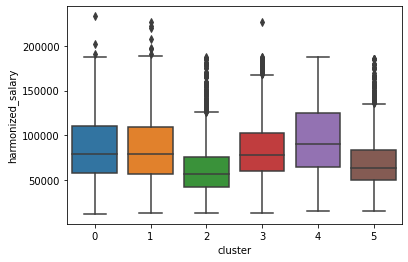

In [40]:
plt = sns.boxplot(
    x='cluster',
    y='harmonized_salary',
    data=df_kmodes_bis
)


<AxesSubplot:xlabel='cluster', ylabel='count'>

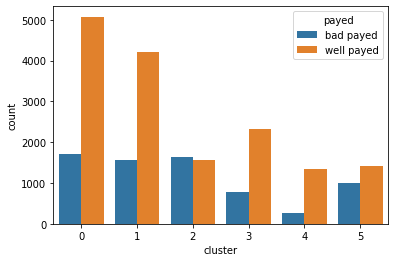

In [55]:
sns.countplot(data=df_kmodes_bis, hue="payed", x="cluster")

              precision    recall  f1-score   support

   bad payed       0.66      0.44      0.53      1404
  well payed       0.78      0.90      0.84      3174

    accuracy                           0.76      4578
   macro avg       0.72      0.67      0.68      4578
weighted avg       0.75      0.76      0.74      4578



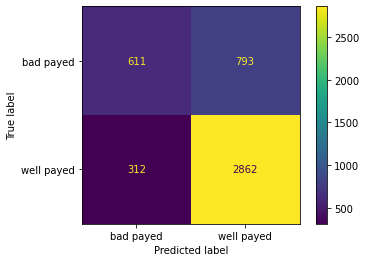

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

X_train, X_test, y_train, y_test = train_test_split(
    df_kmodes_bis[["cluster", "industry", "gender", "years_of_experience_in_field", "highest_level_of_education_completed", "payed"]],
    df_kmodes_bis[["payed", "harmonized_salary"]],
    train_size=0.8,
    random_state=29
)

X_train_used = pd.get_dummies(X_train.drop(["payed"], axis=1))
X_test_used = pd.get_dummies(X_test.drop(["payed"], axis=1))
lr = LogisticRegression(max_iter=200)
lr.fit(X_train_used, y_train["payed"])
predictions = lr.predict(X_test_used)
print(classification_report(y_true=y_test["payed"], y_pred=predictions))
cm = confusion_matrix(y_true=y_test["payed"], y_pred=predictions, labels=lr.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=lr.classes_)
disp.plot()

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_test["payed"] = predictions
X_train_used = pd.get_dummies(X_train)
X_test_used = pd.get_dummies(X_test)
linear = LinearRegression(fit_intercept=False)
linear.fit(X_train_used, y_train["harmonized_salary"])
predictions = linear.predict(X_test_used)
rmse = np.sqrt(mean_squared_error(y_true=y_test["harmonized_salary"], y_pred=predictions))
print(rmse)

32830.11596746776


<AxesSubplot:xlabel='adjusted_annual_salary', ylabel='cluster'>

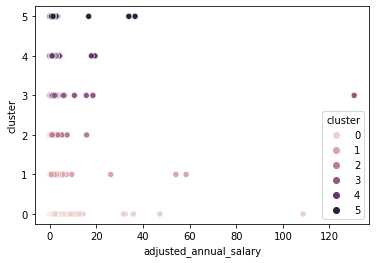

In [44]:
sns.scatterplot(y="cluster", x="adjusted_annual_salary", hue="cluster",data=df_kmodes_bis)


In [45]:
kmode.cluster_centroids_

array([['Woman', 'Technology & Science', "Master's degree",
        '8 - 10 years', '25-34'],
       ['Woman', 'Banking & Insurance', 'College degree',
        '11 - 20 years', '35-44'],
       ['Woman', 'Health', 'College degree', '2 - 4 years', '25-34'],
       ['Woman', 'Education', "Master's degree", '11 - 20 years',
        '35-44'],
       ['Woman', 'Technology & Science', 'College degree', '2 - 4 years',
        '25-34'],
       ['Woman', 'Non profit Organization', 'College degree',
        '5-7 years', '25-34']], dtype='<U23')

In [46]:
kmode.cluster_centroids_

array([['Woman', 'Technology & Science', "Master's degree",
        '8 - 10 years', '25-34'],
       ['Woman', 'Banking & Insurance', 'College degree',
        '11 - 20 years', '35-44'],
       ['Woman', 'Health', 'College degree', '2 - 4 years', '25-34'],
       ['Woman', 'Education', "Master's degree", '11 - 20 years',
        '35-44'],
       ['Woman', 'Technology & Science', 'College degree', '2 - 4 years',
        '25-34'],
       ['Woman', 'Non profit Organization', 'College degree',
        '5-7 years', '25-34']], dtype='<U23')

In [47]:
df_kmodes_bis.to_csv("data/clean_data_final.csv")

In [48]:
centroids = pd.DataFrame(kmode.cluster_centroids_)
centroids.columns=["gender", "industry", "highest_diploma", "age", "experience"]
centroids.to_csv("data/centroids_final.csv")

# Learning K-prototypes

In [117]:
df_kproto = df.copy(deep=True)

In [118]:
df_kproto = df_kproto.drop(["how_old_are_you", "currency", "gender", "race", "country", "annual_salary"], axis=1)

In [119]:
df_kproto

,adjusted_annual_salary,overall_years_of_professional_experience,years_of_experience_in_field,highest_level_of_education_completed,industry,harmonized_salary
0,0.885018,5-7 years,5-7 years,Master's degree,Education,55000.0
1,1.897746,8 - 10 years,5-7 years,College degree,Technology & Science,68796.0
2,0.547102,2 - 4 years,2 - 4 years,College degree,Banking & Insurance,34000.0
3,1.045931,8 - 10 years,5-7 years,College degree,Non profit Organization,62000.0
4,1.078113,8 - 10 years,5-7 years,College degree,Banking & Insurance,60000.0
...,...,...,...,...,...,...
25829,1.399938,5-7 years,5-7 years,College degree,Unidentified,85000.0
25830,0.643650,11 - 20 years,2 - 4 years,College degree,Non profit Organization,40000.0
25831,2.848150,11 - 20 years,11 - 20 years,Master's degree,Technology & Science,148000.0
25832,1.126387,2 - 4 years,2 - 4 years,College degree,Advertising,65000.0


In [120]:
# Get the position of categorical columns
catColumnsPos = [df_kproto.columns.get_loc(col) for col in list(df_kproto.select_dtypes('category').columns)]
print('Categorical columns           : {}'.format(list(df_kproto.select_dtypes('category').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['overall_years_of_professional_experience', 'years_of_experience_in_field', 'highest_level_of_education_completed', 'industry']
Categorical columns position  : [1, 2, 3, 4]


In [121]:
# Convert dataframe to matrix
dfMatrix = df_kproto.to_numpy()
dfMatrix

array([[0.8850184083828944, '5-7 years', '5-7 years', "Master's degree",
        'Education', 55000.0],
       [1.89774552128303, '8 - 10 years', '5-7 years', 'College degree',
        'Technology & Science', 68796.0],
       [0.5471022888185165, '2 - 4 years', '2 - 4 years',
        'College degree', 'Banking & Insurance', 34000.0],
       ...,
       [2.848150150614042, '11 - 20 years', '11 - 20 years',
        "Master's degree", 'Technology & Science', 148000.0],
       [1.1263870652145929, '2 - 4 years', '2 - 4 years',
        'College degree', 'Advertising', 65000.0],
       [2.4143624005561133, '11 - 20 years', '8 - 10 years',
        "Master's degree", 'Law', 146192.0]], dtype=object)

In [122]:
# Choose optimal K using Elbow method
cost = []
K = range(2,10)
for num_clusters in list(K):
    kprototype = KPrototypes(n_jobs = -1, n_clusters = num_clusters, init = 'Huang', random_state = 0)
    kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
    cost.append(kprototype.cost_)

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'AxesSubplot' object has no attribute 'xlabel'

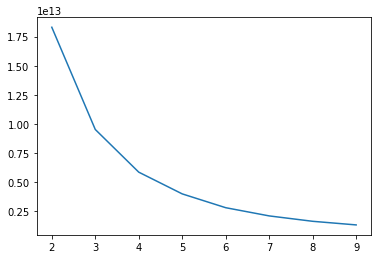

In [125]:
sns.lineplot(K, cost)
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()
plt.show()

In [126]:
# Fit the cluster
kprototype = KPrototypes(n_jobs = -1, n_clusters = 5, init = 'Huang', random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)

array([3, 2, 3, ..., 0, 3, 0], dtype=uint16)

In [127]:
df_kproto['cluster'] = kprototype.labels_
df_kproto

,adjusted_annual_salary,overall_years_of_professional_experience,years_of_experience_in_field,highest_level_of_education_completed,industry,harmonized_salary,cluster
0,0.885018,5-7 years,5-7 years,Master's degree,Education,55000.0,3
1,1.897746,8 - 10 years,5-7 years,College degree,Technology & Science,68796.0,2
2,0.547102,2 - 4 years,2 - 4 years,College degree,Banking & Insurance,34000.0,3
3,1.045931,8 - 10 years,5-7 years,College degree,Non profit Organization,62000.0,3
4,1.078113,8 - 10 years,5-7 years,College degree,Banking & Insurance,60000.0,3
...,...,...,...,...,...,...,...
25829,1.399938,5-7 years,5-7 years,College degree,Unidentified,85000.0,2
25830,0.643650,11 - 20 years,2 - 4 years,College degree,Non profit Organization,40000.0,3
25831,2.848150,11 - 20 years,11 - 20 years,Master's degree,Technology & Science,148000.0,0
25832,1.126387,2 - 4 years,2 - 4 years,College degree,Advertising,65000.0,3


In [128]:
kprototype.cluster_centroids_

array([['3.3761018119426023', '169893.24963959635', '11 - 20 years',
        '11 - 20 years', 'College degree', 'Technology & Science'],
       ['5.69310790418902', '244529.26545454544', '11 - 20 years',
        '11 - 20 years', 'College degree', 'Technology & Science'],
       ['1.5266407118154788', '81768.86719668248', '11 - 20 years',
        '11 - 20 years', 'College degree', 'Technology & Science'],
       ['0.9495410836845368', '48440.77150908719', '11 - 20 years',
        '2 - 4 years', 'College degree', 'Education'],
       ['2.2381666179250996', '120663.52284679793', '11 - 20 years',
        '11 - 20 years', 'College degree', 'Technology & Science']],
      dtype='<U32')